# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Antonius Wisang Bayu Nugraha
- **Email:** m008b4ky0594@bangkit.academy
- **ID Dicoding:** antonius_bayu

## Menentukan Pertanyaan Bisnis

- Question 1 : How do weather conditions affect how many bikes are rented?
- Question 2 : How do the seasons influence bike rentals?

## Import Semua Packages/Library yang Digunakan

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [279]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [280]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The data used comes from the **Bike Sharing** dataset, specifically from **day.csv** and **hour.csv** files.
- The dataset includes bike rental counts integrated with various external factors such as time, day, weather, season, and more.

### Assessing Data

### Assessing `day_df`

In [281]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [282]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [283]:

print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [284]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Assessing `hour_df`

In [285]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [286]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [287]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [288]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- A check was conducted on the data quality, such as whether there were any missing values or duplicate data.
- No missing values or duplicate data were found, meaning the data is clean and free from information defects.

### Cleaning Data

### Cleaning `day_df`

In [289]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['day_of_week'] = day_df['dteday'].dt.day_name()

### Cleaning `hour_df`

In [290]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()

**Insight:**
- Since there were almost no data defects after the data assessment, the cleaning process was carried out to ensure all variables are in the correct format for analysis.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [291]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
109,110,2011-04-20,2,0,4,0,3,1,1,0.595000,0.564392,0.614167,0.241925,613,3331,3944,Wednesday
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795,Tuesday
120,121,2011-05-01,2,0,5,0,0,0,2,0.451667,0.448204,0.762083,0.106354,1138,2213,3351,Sunday
378,379,2012-01-14,1,1,1,0,6,0,1,0.180000,0.183087,0.457500,0.187183,333,2160,2493,Saturday
24,25,2011-01-25,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985,Tuesday


In [292]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [293]:
season_rentals = day_df.groupby('season')['cnt'].sum()
print(season_rentals)

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


### `Explore hour_df`

In [294]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
340,341,2011-01-15,1,0,1,16,0,6,0,2,0.34,0.3333,0.34,0.1940,33,95,128,Saturday
1710,1711,2011-03-16,1,0,3,22,0,3,1,2,0.40,0.4091,0.62,0.3881,11,48,59,Wednesday
10771,10772,2012-03-29,2,1,3,22,0,4,1,1,0.42,0.4242,0.44,0.2836,17,135,152,Thursday
7772,7773,2011-11-25,4,0,11,11,0,5,1,1,0.40,0.4091,0.66,0.1045,99,127,226,Friday
14229,14230,2012-08-21,3,1,8,2,0,2,1,2,0.58,0.5455,0.88,0.2836,1,7,8,Tuesday


In [295]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [296]:
weather_rentals = hour_df.groupby('weathersit')['cnt'].sum().reset_index()
print(weather_rentals)

   weathersit      cnt
0           1  2338173
1           2   795952
2           3   158331
3           4      223


**Insight:**
- Exploratory analysis was conducted to identify bike rental patterns considering weather and season variables.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

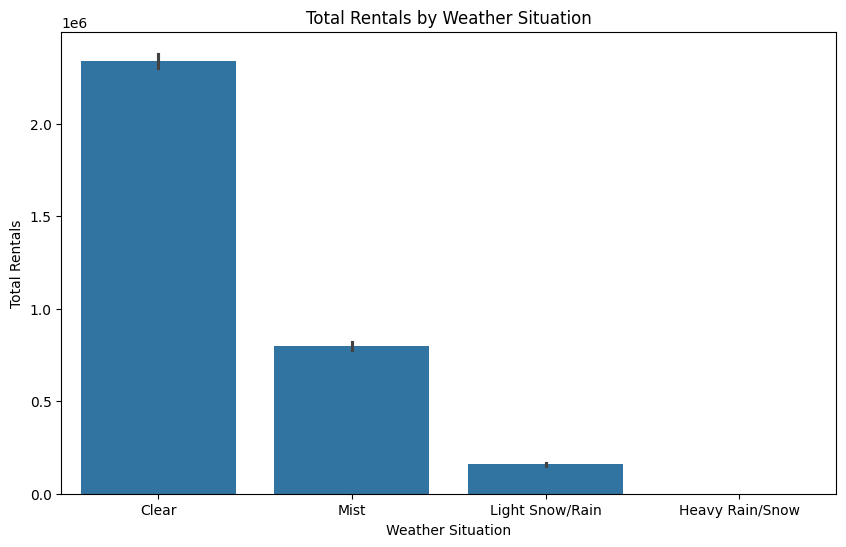

In [297]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=hour_df, estimator=sum)
plt.title('Total Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

### Pertanyaan 2:

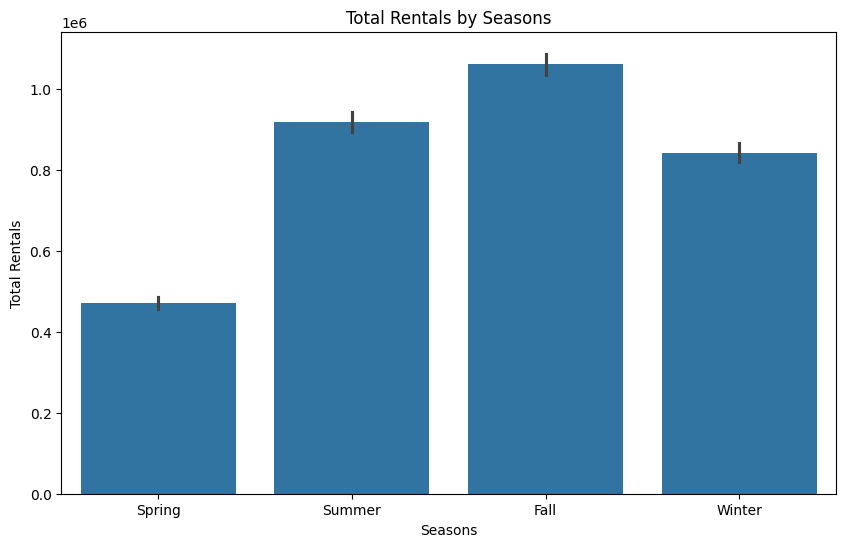

In [298]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=hour_df, estimator=sum)
plt.title('Total Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Rentals')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

**Insight:**
- Data visualization was performed to provide an overview of the bike rental patterns.
- A bar chart showed the highest rental counts during clear weather, followed by mist, light snow/rain, and heavy snow/rain, with the lowest rental counts.
- The visualization also revealed a significant rental peak during the months of the 3rd season (fall).

## Analisis Lanjutan (Opsional)

RFM analysis aims to understand user behavior by evaluating how recently users rented bikes, how often they rented them, and the total rental count, which serves as a proxy for their monetary value. This analysis helps identify high-value users, enhance customer retention strategies, and tailor marketing efforts.

In [299]:


hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


casual_users = hour_df.groupby('instant').agg({
    'dteday': 'max',          
    'casual': 'sum'          
}).reset_index()


casual_users.columns = ['user_id', 'last_rental_date', 'total_rentals']


today = hour_df['dteday'].max()  
casual_users['recency'] = (today - casual_users['last_rental_date']).dt.days


registered_users = hour_df.groupby('instant').agg({
    'dteday': 'max',         
    'registered': 'sum'       
}).reset_index()


registered_users.columns = ['user_id', 'last_rental_date', 'total_rentals']


registered_users['recency'] = (today - registered_users['last_rental_date']).dt.days

rfm_data = pd.concat([
    casual_users[['user_id', 'recency', 'total_rentals']],
    registered_users[['user_id', 'recency', 'total_rentals']]
], ignore_index=True)


rfm_data['monetary'] = rfm_data['total_rentals']


rfm_data.drop(columns=['total_rentals'], inplace=True)


print(rfm_data.head())


rfm_data['R_quartile'] = pd.qcut(rfm_data['recency'], 4, labels=[4, 3, 2, 1])  
rfm_data['F_quartile'] = pd.qcut(rfm_data['monetary'], 4, labels=[1, 2, 3, 4])  
rfm_data['M_quartile'] = pd.qcut(rfm_data['monetary'], 4, labels=[1, 2, 3, 4])  #


rfm_data['RFM_Score'] = rfm_data['R_quartile'].astype(str) + rfm_data['F_quartile'].astype(str) + rfm_data['M_quartile'].astype(str)


print(rfm_data.head())


   user_id  recency  monetary
0        1      730         3
1        2      730         8
2        3      730         5
3        4      730         3
4        5      730         0
   user_id  recency  monetary R_quartile F_quartile M_quartile RFM_Score
0        1      730         3          1          1          1       111
1        2      730         8          1          1          1       111
2        3      730         5          1          1          1       111
3        4      730         3          1          1          1       111
4        5      730         0          1          1          1       111


## Conclusion

- Conclusion  1 : Weather conditions significantly impact bike rentals, with clear days seeing the highest rentals.
- Conclusion  2 : Seasons significantly impact bike rentals, with 3rd season(fall) has the highest rentals.